In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10
from datetime import datetime
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import normalize
from sklearn.grid_search import GridSearchCV

In [199]:
df = pd.read_csv("C:/Users/Rathore/Downloads/Project Datasets/startup funding/funding_data.csv")
df = df.drop(['SNo','Remarks','SubVertical'],axis = 1)
df = df.dropna()
df = df.reset_index(drop=True)


In [200]:

#df['Date'] = ['' if df['Date'][dt].find('.') < 0 else '' for dt in range(0, len(df['Date']))]
for dt in range(0, len(df['Date'])):
    try:
        df['Date'][dt] = datetime.strptime(df['Date'][dt], '%d/%m/%Y').date()
       
    except:
        if dt > 0:
            df['Date'][dt] = df['Date'][dt-1]
        else:
            df['Date'][dt] = df['Date'][dt+1]
df.head()



,Date,StartupName,IndustryVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,2017-08-01,TouchKin,Technology,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,2017-08-02,Zepo,Consumer Internet,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
2,2017-08-02,Click2Clinic,Consumer Internet,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"
3,2017-07-01,Billion Loans,Consumer Internet,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000"
4,2017-07-03,Ecolibriumenergy,Technology,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000"


In [201]:
df["month"] = [str(dt.month) for dt in df.Date]

In [202]:
for i in range(0,len(df.AmountInUSD)):
    df.AmountInUSD[i] = int(df.AmountInUSD[i].replace(",",""))

df['Amount_USD'] = list(map(int,df.AmountInUSD))

In [203]:
df = df.drop('AmountInUSD',axis = 1)

#df = df.groupby(['month','Date','CityLocation']).sum().reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 8 columns):
Date                1385 non-null object
StartupName         1385 non-null object
IndustryVertical    1385 non-null object
CityLocation        1385 non-null object
InvestorsName       1385 non-null object
InvestmentType      1385 non-null object
month               1385 non-null object
Amount_USD          1385 non-null int64
dtypes: int64(1), object(7)
memory usage: 86.6+ KB


In [204]:
count = df['IndustryVertical'].value_counts()
count.head(10)
# plt.figure(figsize=(12,6))
# sns.barplot(count.index, count.values, alpha=0.8)
# plt.xticks(rotation='vertical')
# plt.xlabel('Investment Type', fontsize=12)
# plt.ylabel('Number of fundings made', fontsize=12)
# plt.title("Type of Investment made", fontsize=16)
# plt.show()

Consumer Internet       459
Technology              189
eCommerce               113
ECommerce                32
Logistics                16
Education                15
Healthcare               14
Food & Beverage          12
Finance                   7
Online Food Delivery      5
Name: IndustryVertical, dtype: int64

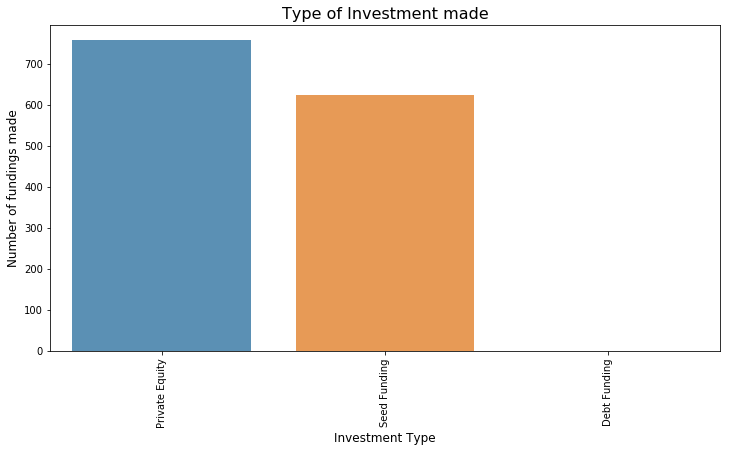

In [205]:

count = df['InvestmentType'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index, count.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Type of Investment made", fontsize=16)
plt.show()

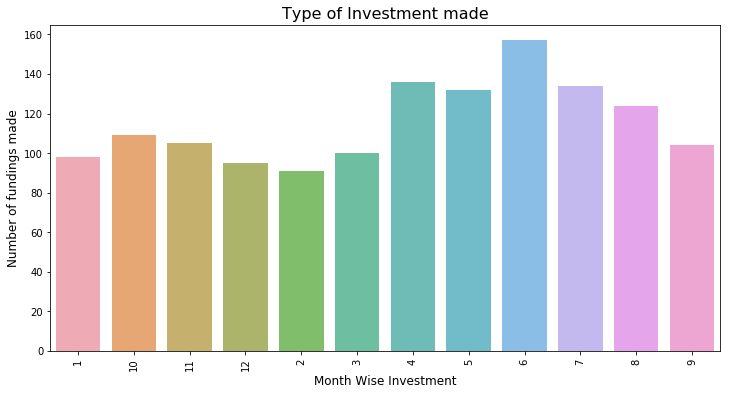

In [206]:

count = df['month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index, count.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Month Wise Investment', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Type of Investment made", fontsize=16)
plt.show()

   month  Amount_USD
0      1   953113500
1     10   492409000
2     11  1156952000
3     12   493096000
4      2   626449500
5      3  2573842608
6      4  1966335000
7      5  2448444000
8      6  1065717000
9      7  1982908000
10     8  1600555000
11     9  1710881000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

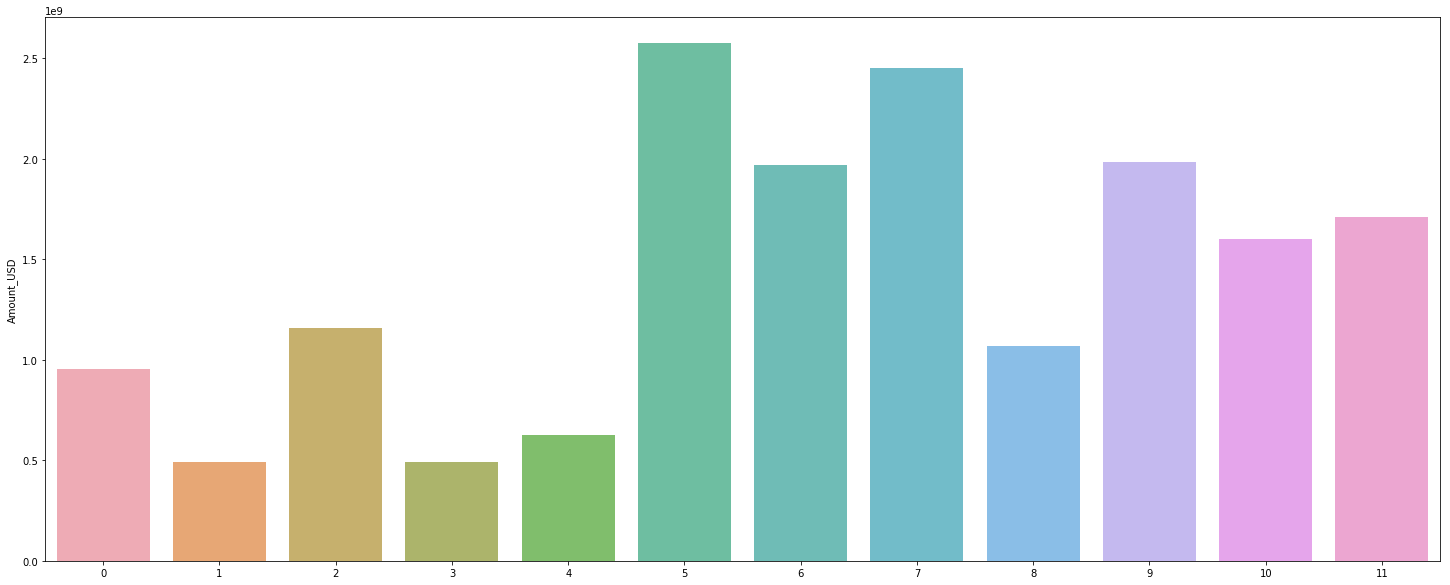

In [207]:
# count = df['month'].value_counts()
# amount = df.Amount_USD
month_mean = df.groupby(['month']).sum().groupby(level=0).mean().reset_index()
print(month_mean)

#plt.bar(month_mean.index,month_mean.Amount_USD)
# plt.figure(figsize=(12,6))
sns.barplot(month_mean.index, month_mean.Amount_USD, alpha=0.8)
plt.xticks()
# plt.xlabel('Month Wise Investment', fontsize=12)
# plt.ylabel('Number of fundings made', fontsize=12)
# plt.title("Type of Investment made", fontsize=16)
# plt.show()

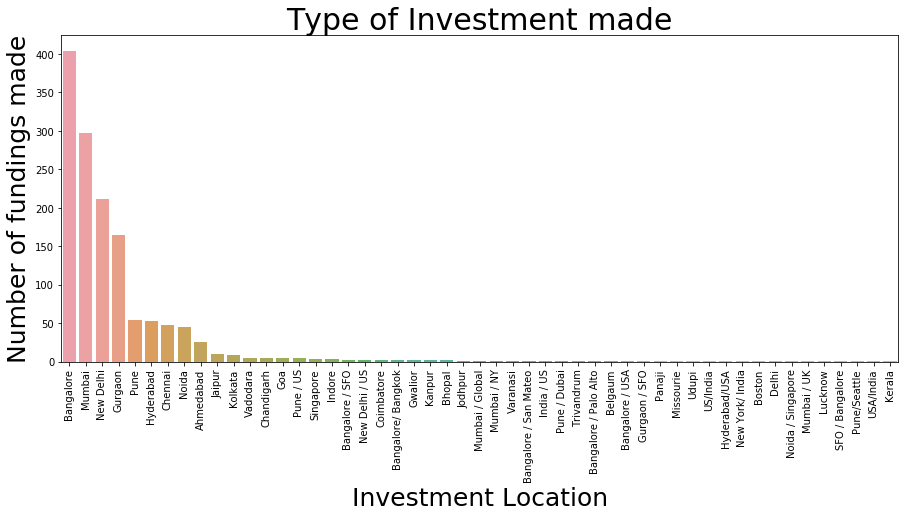

In [208]:
count = df['CityLocation'].value_counts()
plt.figure(figsize=(15,6))
sns.barplot(count.index, count.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Investment Location', fontsize=25)
plt.ylabel('Number of fundings made', fontsize=25)
plt.title("Type of Investment made", fontsize=30)
plt.show()

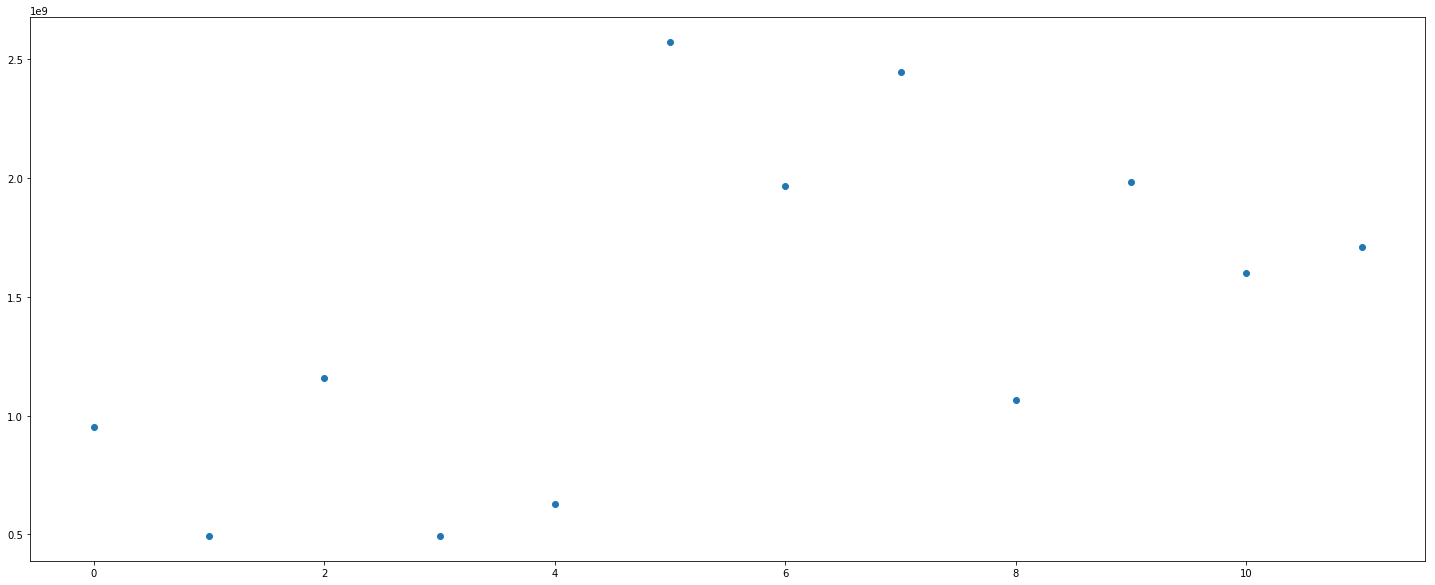

In [209]:
month_mean = df.groupby(['month']).sum().groupby(level=0).mean().reset_index()
plt.scatter(month_mean.index,month_mean.Amount_USD)
plt.show()

In [210]:
# month_mean = df.groupby(['month']).sum().groupby(level=0).mean().reset_index()
# x = month_mean.index
# y =month_mean.Amount_USD
# plt.bar(x,y)
# plt.show()
df= df.drop('Date',axis = 1)

In [211]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df.head()


,StartupName,IndustryVertical,CityLocation,InvestorsName,InvestmentType,month,Amount_USD
0,TouchKin,Technology,Bangalore,Kae Capital,Private Equity,8,1300000
1,Zepo,Consumer Internet,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,8,500000
2,Click2Clinic,Consumer Internet,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,8,850000
3,Billion Loans,Consumer Internet,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,7,1000000
4,Ecolibriumenergy,Technology,Ahmedabad,"Infuse Ventures, JLL",Private Equity,7,2600000


In [212]:
train,test= train_test_split(df,test_size=0.2,random_state =10)
train_x = train.drop(['Amount_USD'],axis = 1)
train_y = train['Amount_USD']
test_x = test.drop(['Amount_USD'],axis = 1)
test_y = test['Amount_USD']
#print(train_y)


In [213]:
from sklearn.preprocessing import LabelEncoder
le1, le2, le3, le4, le5,le6 = LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder() 
le1.fit(df.InvestmentType)
le2.fit(df.InvestorsName)
le3.fit(df.IndustryVertical)
le4.fit(df.StartupName)
le5.fit(df.CityLocation)
le6.fit(df.month)
# le1.transform(df.InvestmentType)
# le2.transform(df.InvestorsName)
# le3.transform(df.IndustryVertical)
# le4.transform(df.StartupName)
# le5.transform(df.CityLocation)

LabelEncoder()

In [221]:
train_df = pd.DataFrame(
    {
'InvestmentType': le1.transform(train_x.InvestmentType),
'InvestorsName': le2.transform(train_x.InvestorsName),
'IndustryVertical': le3.transform(train_x.IndustryVertical),
'StartupName': le4.transform(train_x.StartupName),
'CityLocation': le5.transform(train_x.CityLocation),
'month': le6.transform(train_x.month)        
        
    })
test_df=  (pd.DataFrame(
    {
    
'InvestmentType': le1.transform(test_x.InvestmentType),
'InvestorsName': le2.transform(test_x.InvestorsName),
'IndustryVertical': le3.transform(test_x.IndustryVertical),
'StartupName': le4.transform(test_x.StartupName),
'CityLocation': le5.transform(test_x.CityLocation),
'month': le6.transform(test_x.month)         
    }))
test_df.head()

,CityLocation,IndustryVertical,InvestmentType,InvestorsName,StartupName,month
0,36,490,1,452,635,9
1,33,63,2,359,1207,8
2,1,454,1,1067,1110,3
3,33,454,1,419,486,6
4,33,172,1,226,1049,8


In [163]:
clf = GradientBoostingRegressor(learning_rate =0.1,max_depth = 11,min_samples_split =100,min_samples_leaf =20,n_estimators =40,
                               max_features =3,random_state =43)
clf.fit(train_df,train_y)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=13, max_features=3,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=10,
             min_samples_split=50, min_weight_fraction_leaf=0.0,
             n_estimators=80, presort='auto', random_state=43,
             subsample=1.0, verbose=0, warm_start=False)

In [175]:

from sklearn.metrics import mean_squared_error
pred = clf.predict(test_df)
RMSE= np.sqrt(mean_squared_error(test_y,pred))
RMSE 

87156461.203196511

In [128]:
parameter1 = {'learning_rate':(0.1,0.05,0.03,0.01),'max_depth':(6,7, 8, 9, 10,11 ),'min_samples_split':(30,50,100,150,200),
              'min_samples_leaf':(20,30,40,50,60,70,80),'n_estimators':(40,60,80,100,120),'max_features':(3,4)}
gsearch1 = GridSearchCV(clf,parameter1)
gsearch1.fit(train_df,train_y)
gsearch1.grid_scores_, gsearch1.best_params_,gsearch1.best_score_

([mean: 0.12234, std: 0.02707, params: {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 20, 'min_samples_split': 30, 'n_estimators': 40},
  mean: 0.11745, std: 0.02661, params: {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 20, 'min_samples_split': 30, 'n_estimators': 60},
  mean: 0.10868, std: 0.05533, params: {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 20, 'min_samples_split': 30, 'n_estimators': 80},
  mean: 0.07984, std: 0.01556, params: {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 20, 'min_samples_split': 30, 'n_estimators': 100},
  mean: 0.11322, std: 0.05858, params: {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 20, 'min_samples_split': 30, 'n_estimators': 120},
  mean: 0.13297, std: 0.03270, params: {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 20, 'min_samples_split': 50, 'n_estimators': 4

In [153]:
parameter1 = {'learning_rate':(0.1,0.05),'max_depth':(6,7, 8, 9, 10,11 ),'min_samples_split':(50,80,100,120),
              'min_samples_leaf':(15,20,25,30,35,40),'n_estimators':(40,60,80,100,120),'max_features':(3,4)}
gsearch1 = GridSearchCV(clf,parameter1)
gsearch1.fit(train_df,train_y)
gsearch1.grid_scores_, gsearch1.best_params_,gsearch1.best_score_

([mean: 0.14306, std: 0.06790, params: {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 15, 'min_samples_split': 50, 'n_estimators': 40},
  mean: 0.14880, std: 0.06491, params: {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 15, 'min_samples_split': 50, 'n_estimators': 60},
  mean: 0.14125, std: 0.06629, params: {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 15, 'min_samples_split': 50, 'n_estimators': 80},
  mean: 0.11889, std: 0.05691, params: {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 15, 'min_samples_split': 50, 'n_estimators': 100},
  mean: 0.11732, std: 0.05602, params: {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 15, 'min_samples_split': 50, 'n_estimators': 120},
  mean: 0.14995, std: 0.04199, params: {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 15, 'min_samples_split': 80, 'n_estimators': 4

In [154]:
parameter1 = {'max_depth':(8, 9, 10,11,12 ),'min_samples_split':(50,80,100,120),
              'min_samples_leaf':(5,10,15,20,25),'n_estimators':(80,90,100,110),'max_features':(2,3)}
gsearch1 = GridSearchCV(clf,parameter1)
gsearch1.fit(train_df,train_y)
gsearch1.grid_scores_, gsearch1.best_params_,gsearch1.best_score_

([mean: 0.03966, std: 0.06485, params: {'max_depth': 8, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 50, 'n_estimators': 80},
  mean: 0.02635, std: 0.06741, params: {'max_depth': 8, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 50, 'n_estimators': 90},
  mean: 0.01775, std: 0.06313, params: {'max_depth': 8, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 50, 'n_estimators': 100},
  mean: 0.00395, std: 0.06784, params: {'max_depth': 8, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 50, 'n_estimators': 110},
  mean: 0.05881, std: 0.03286, params: {'max_depth': 8, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 80, 'n_estimators': 80},
  mean: 0.06005, std: 0.03359, params: {'max_depth': 8, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 80, 'n_estimators': 90},
  mean: 0.05811, std: 0.05181, params: {'max_depth': 8, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 80, 'n_estimato

In [171]:
clf1 = RandomForestRegressor(max_features =3,n_estimators = 30,min_samples_leaf =5 ,min_samples_split =50 ,max_depth = 6)
clf1.fit(train_df,train_y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=50, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [173]:
pred = clf1.predict(test_df)
RMSE = np.sqrt(mean_squared_error(test_y,pred))
RMSE 

87047752.920347169

In [170]:
parameter2 = {'max_depth':(5,6,7,8 ),'min_samples_split':(50,80,100,120),
              'min_samples_leaf':(5,10,15,20,25),'max_features':(2,3,4),'n_estimators':(20,30,40,50,100)}
gsearch2 = GridSearchCV(clf1,parameter2)
gsearch2.fit(train_df,train_y)
gsearch2.grid_scores_, gsearch2.best_params_,gsearch2.best_score_

([mean: 0.09181, std: 0.03811, params: {'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 50, 'n_estimators': 20},
  mean: 0.07709, std: 0.02587, params: {'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 50, 'n_estimators': 30},
  mean: 0.09928, std: 0.04705, params: {'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 50, 'n_estimators': 40},
  mean: 0.10352, std: 0.04163, params: {'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 50, 'n_estimators': 50},
  mean: 0.10616, std: 0.04710, params: {'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 50, 'n_estimators': 100},
  mean: 0.08979, std: 0.04934, params: {'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 80, 'n_estimators': 20},
  mean: 0.08113, std: 0.03046, params: {'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 80, 'n_estimator

In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
clf2 = LinearRegression()
clf2.fit(train_df,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [186]:
pred = clf2.predict(test_df)
RMSE = np.sqrt(mean_squared_error(test_y,pred))
RMSE 

87116462.182910815

In [251]:
train_scale =normalize(train_df)
test_scale = normalize(test_df)
optimizer = SGDRegressor(n_iter=10000)
optimizer.fit(train_scale,train_y)


C:\Users\Rathore\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=10000, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [252]:



pred = optimizer.predict(test_scale)
optimizer.score(test_scale,test_y)
RMSE = np.sqrt(mean_squared_error(test_y,pred))
RMSE 

87762500.285285264